In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Open inc_points_2
TP = pd.read_csv("/content/drive/MyDrive/test/inc_points_2.csv")

In [3]:
# Open OS token
OS = pd.read_csv("/content/drive/MyDrive/test/os.csv")

In [4]:
# Open rich_tracks_2
RT = pd.read_csv("/content/drive/MyDrive/test/rich_tracks_2.csv")

In [ ]:
# Read part of inc_points_2
TP.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926


In [ ]:
# Read part of OS token
OS.head()

,DeviceToken,os_version
0,2A768BE9-24E4-4274-AE30-03D07EE1D5B8,Android
1,CA447E48-E1C4-4F06-BA03-35C029C7E0F8,Android
2,EB26DDE2-8C75-439B-8FDA-AE838E15E944,iOS
3,3135D84F-1A08-4CBF-9439-D6C1BA58F4AA,iOS
4,16B59F05-9FEC-40DA-A181-C42B1AA2B517,Android


In [ ]:
# Read part of rich_tracks_2
RT.head()

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
0,5148865,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2,1,1.45,1.316667,OriginalDriver,False,"Тойминская улица 11А, Менделеевск, Менделеевск...","Сосновая улица 4, Менделеевск, Менделеевский р...",4.096,True,Республика Татарстан,Россия,0.0,2.50,5.000000,5.0,0.650,0.818,0.812,NaN,1061,0.000000,0.0,10.516666,3.75,0.20,0.800,1.0,0.875,84.599998,38.704914,0.033333,0.789,0.045,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Менделеевский район,Менделеевский район,2019-10-17 15:01:40.393,1.0,1.0,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443
1,5148032,4BDD2EE6-FF53-4762-83DA-35A849935A99,669AFC5F-921C-40B9-B090-587BC95D34C2,20691750,2019-10-17 17:35:30.0000000 +05:00,2019-10-17 18:00:56.0000000 +05:00,414.076500,25.433333,0,1,4.75,0.000000,OriginalDriver,False,"улица Труда 166/1, Центральный район, Челябинс...","улица Блюхера 69А, Советский район, Челябинск,...",6.233,True,Челябинская область,Россия,5.0,5.00,4.993904,5.0,0.608,0.000,0.000,NaN,1061,1.033333,0.0,24.400000,3.75,1.00,1.000,1.0,0.875,70.917030,27.351787,0.000000,0.000,0.000,1.0,NaN,100.0,100.0,100.0,75.0,92.500000,0.0,Челябинск,Челябинск,2019-10-17 13:06:47.537,0.0,0.0,16.0,0.0,29.0,0.0,NaN,NaN,NaN,0.0,17.956039
2,5147957,A0624E01-25FD-4B2D-A56E-617BB2546526,55D0C3A4-9E5B-4B57-BC22-E986158707F8,20690445,2019-10-17 16:35:25.0000000 +04:00,2019-10-17 16:49:04.0000000 +04:00,6.498145,13.650000,0,0,5.00,1.366667,OriginalDriver,False,"улица Мира 64, Волжский, Волгоградская область...","улица Пушкина 17, Волжский, Волгоградская обла...",7.135,True,Волгоградская область,Россия,5.0,5.00,5.000000,5.0,1.990,0.164,0.000,NaN,1061,0.000000,0.0,13.650000,5.00,1.00,1.000,1.0,1.000,63.825897,38.091320,0.000000,0.819,0.000,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Волжский,Волжский,2019-10-17 12:58:55.733,0.0,0.0,4.0,1.0,63.0,4.0,NaN,NaN,NaN,0.0,18.219858
3,5147902,D233A0EB-2D09-47F3-B0EB-3D852434F982,8E58407D-8933-4AFB-B158-81FF4548AEC4,20689861,2019-10-17 19:35:07.0000000 +07:00,2019-10-17 19:40:59.0000000 +07:00,1.148526,5.866667,0,1,4.75,1.983333,OriginalDriver,False,"Рентгеновская улица 77, Заельцовский район, Но...","Уфимская улица 29, Заельцовский район, Новосиб...",1.056,True,Новосибирская область,Россия,5.0,5.00,3.000000,5.0,0.000,0.000,0.000,NaN,1061,5.866667,0.0,0.000000,3.75,1.00,1.000,1.0,0.875,54.683998,18.418604,0.000000,0.551,0.000,1.0,NaN,100.0,100.0,100.0,50.0,85.000008,0.0,Новосибирск,Новосибирск,2019-10-17 12:49:51.397,0.0,0.0,37.0,20.0,51.0,23.0,NaN,NaN,NaN,0.0,5.328696
4,5150087,0195F786-966E-49AF-9326-82697CCC9011,0CE60F80-6BA3-4706-916B-BA864A434F46,20713090,2019-10-17 15:35:03.0000000 +03:00,2019-10-17 16:09:45.0000000 +03:00,8.160865,34.700000,2,1,2.65,0.000000,OriginalDriver,False,"улица Некрасова 56, Центральный район, Санкт-П...","Кузнецовская улица 31 лит А, Московский район,...",7.983,True,Санкт-Петербург,Россия,2.3,2.52,5.000000,5.0,0.883,0.191,0.226,NaN,1061,0.000000,0.0,34.700001,3.83,0.46,0.805,1.0,0.885,74.087929,31.291415,0.000000,0.000,0.000,1.0,NaN,100.0,100.0,10

In [5]:
# Create DF with ID and device token
ID_t = pd.DataFrame({'IncomingTrackId':RT['IncomingTrackId'], 'DeviceToken':RT['DeviceToken']})

In [6]:
# Merge ID_t with OS
ID_OS = pd.merge(ID_t, OS, on='DeviceToken')
ID_OS = ID_OS.drop('DeviceToken', axis=1)

In [7]:
# Merge ID_OS with TP
TP_OS = pd.merge(TP, ID_OS, on='IncomingTrackId')
TP_OS

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,os_version
0,20702795,0.000000e+00,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.000000,0.000000,1571315732,0.829803,0.322861,-0.154434,iOS
1,20702795,0.000000e+00,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.000000,0.000000,1571315733,0.716080,0.612228,-0.168091,iOS
2,20702795,0.000000e+00,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.000000,0.000000,1571315734,0.913208,0.488998,0.308365,iOS
3,20702795,0.000000e+00,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.000000,0.000000,1571315735,0.930328,0.396133,-0.145203,iOS
4,20702795,0.000000e+00,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.000000,0.000000,1571315736,0.887436,0.647537,0.245926,iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822684,21514828,5.010769e-15,48.774338,44.802745,2019-10-23 12:34:41.0000000 +04:00,28888.0,0.002899,0.028434,1571834081,-0.536301,5.410896,-7.910442,Android
3822685,21514828,2.912739e-15,48.774338,44.802745,2019-10-23 12:34:42.0000000 +04:00,28921.0,0.001424,0.013966,1571834082,-0.536301,5.497087,-7.977480,Android
3822686,21514828,9.111070e-16,48.774338,44.802745,2019-10-23 12:34:44.0000000 +04:00,28989.0,-0.001739,-0.017059,1571834084,-0.478840,5.458780,-7.929596,Android
3822687,21514828,5.550616e-16,48.774338,44.802745,2019-10-23 12:34:45.0000000 +04:00,29025.0,-0.004315,-0.042333,1571834085,-0.430956,5.487510,-7.872135,Android


In [ ]:
# Data info
TP_OS.describe()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06
mean,2.069676e+07,2.805110e+01,3.205446e+01,7.034660e+01,1.257628e+05,5.859348e-02,1.145132e-01,1.571306e+09,9.780570e-02,3.216236e-01,3.199528e-01
std,2.340588e+05,3.251927e+01,3.588891e+01,4.571365e+01,1.561878e+05,7.221290e-01,1.111087e+00,1.593098e+05,1.766374e+00,2.733806e+00,2.898338e+00
min,1.988839e+07,0.000000e+00,-4.315735e+01,-1.563825e+02,-4.500000e+05,-2.189765e+01,-3.603381e+01,1.570343e+09,-4.738030e+01,-4.837484e+01,-3.865796e+01
25%,2.066303e+07,8.261786e-02,1.352203e+00,3.762926e+01,3.383600e+04,0.000000e+00,0.000000e+00,1.571302e+09,-2.192993e-01,-6.949768e-01,-8.495789e-01
50%,2.068272e+07,1.304783e+01,5.267011e+01,5.002772e+01,1.097650e+05,0.000000e+00,0.000000e+00,1.571310e+09,0.000000e+00,-6.968689e-02,-3.171387e-01
75%,2.071867e+07,5.109833e+01,5.576547e+01,1.038622e+02,1.639000e+05,0.000000e+00,0.000000e+00,1.571317e+09,1.961823e-01,3.924103e-01,2.822266e-01
max,2.151483e+07,2.251463e+02,6.949774e+01,1.586358e+02,3.087814e+06,2.549077e+01,3.598226e+01,1.571850e+09,4.149518e+01,3.452544e+01,4.120547e+01


In [11]:
# Choise data with iOS
TP_iOS = TP_OS.query("os_version == 'iOS'")

In [12]:
# Choise data with OS Android
TP_A = TP_OS.query("os_version == 'Android'")

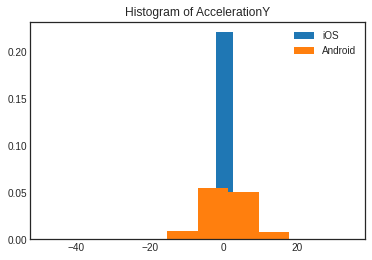

In [24]:
# Plot histogram for column "AccelerationYOriginal" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["AccelerationYOriginal"], label='iOS', density = True)
plt.hist(TP_A["AccelerationYOriginal"], label='Android', density = True)
plt.title('Histogram of AccelerationY')
plt.legend()

Conclusion - different units of measurement AccelerationYOriginal

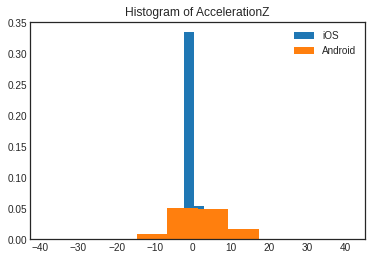

In [23]:
# Plot histogram for column "AccelerationZOriginal" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["AccelerationZOriginal"], label='iOS', density = True)
plt.hist(TP_A["AccelerationZOriginal"], label='Android', density = True)
plt.title('Histogram of AccelerationZ')
plt.legend()

Conclusion - different units of measurement AccelerationZOriginal

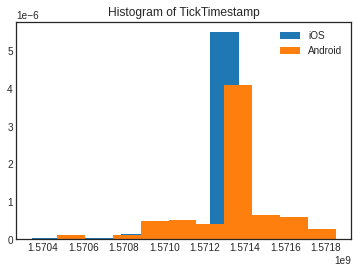

In [22]:
# Plot histogram for column "TickTimestamp" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["TickTimestamp"], label='iOS', density = True)
plt.hist(TP_A["TickTimestamp"], label='Android', density = True)
plt.title('Histogram of TickTimestamp')
plt.legend()

Conclusion - the same units of measurement TickTimestamp

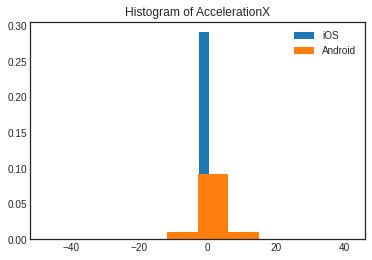

In [25]:
# Plot histogram for column "AccelerationXOriginal" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["AccelerationXOriginal"], label='iOS', density = True)
plt.hist(TP_A["AccelerationXOriginal"], label='Android', density = True)
plt.title('Histogram of AccelerationX')
plt.legend()

Conclusion - different units of measurement AccelerationX

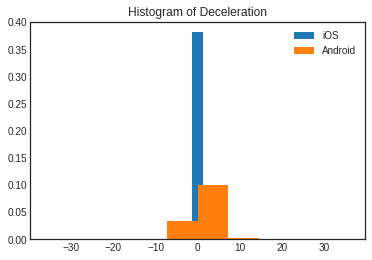

In [26]:
# Plot histogram for column "Deceleration" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["Deceleration"], label='iOS', density = True)
plt.hist(TP_A["Deceleration"], label='Android', density = True)
plt.title('Histogram of Deceleration')
plt.legend()

Conclusion - different units of measurement Deceleration

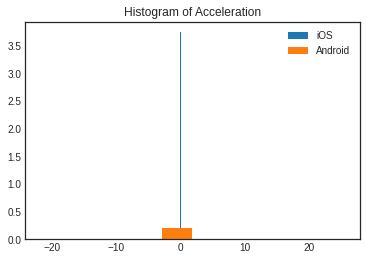

In [27]:
# Plot histogram for column "Acceleration" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["Acceleration"], label='iOS', density = True)
plt.hist(TP_A["Acceleration"], label='Android', density = True)
plt.title('Histogram of Acceleration')
plt.legend()

Conclusion - different units of measurement Acceleration

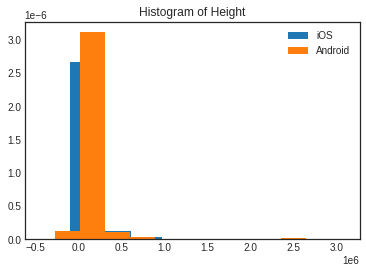

In [28]:
# Plot histogram for column "Height" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["Height"], label='iOS', density = True)
plt.hist(TP_A["Height"], label='Android', density = True)
plt.title('Histogram of Height')
plt.legend()

Conclusion - the same units of measurement Height

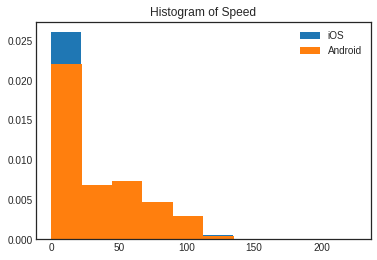

In [30]:
# Plot histogram for column "Speed" by "os_version"
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(TP_iOS["Speed"], label='iOS', density = True)
plt.hist(TP_A["Speed"], label='Android', density = True)
plt.title('Histogram of Speed')
plt.legend()

Conclusion - the same units of measurement Speed

In [ ]:
# Diffrent dimension - different cluster. Use GMM for clustering data in in columns
from sklearn import mixture # Choise model сlass
model = mixture.GaussianMixture(n_components=2, covariance_type='full') # Create model instance with hyperparametrs
                                                    # n_components=2 (IOS, Android)
model.fit(TP['Speed'].values.reshape(-1, 1)) # Train model
y_speed = model.predict(TP['Speed'].values.reshape(-1, 1)) #Define labels of clusters

In [ ]:
# Import Seaborn for plot clusters
import seaborn as sns

In [ ]:
cluster= pd.DataFrame({'speed':TP['Speed'], 'speed_pred':y_speed})
cluster.describe()

,speed,speed_pred
count,3.791240e+06,3.791240e+06
mean,2.787974e+01,7.667064e-01
std,3.236938e+01,4.229276e-01
min,0.000000e+00,0.000000e+00
25%,7.917608e-02,1.000000e+00
50%,1.290722e+01,1.000000e+00
75%,5.079600e+01,1.000000e+00
max,2.251463e+02,1.000000e+00
